## MTurk I/O for Image Dataset

The query of interest is: **The outlined boxes depict a person riding a bike** 

Want to generate the input .csv file for MTurk and parse the output csv file for results. Using MTurkHelper from babble with adjustments for candidate type.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

import os
import sys
sys.path.append('/dfs/scratch0/paroma/coco')
sys.path.append('/dfs/scratch0/paroma/coco/PythonAPI/')

from pycocotools.coco import COCO
import skimage.io as io
import pylab
import cv2

import pandas as pd


%load_ext autoreload
%autoreload 2

## Generate Input CSV
Load the necessary data for this task and write out variables in the form:

`<img class="img-responsive center-block" src="http://paroma.github.io/turk_images/train_IDX_PIDX_BIDX.png" />`

In [2]:
vg_folder = '/dfs/scratch0/paroma/visual_genome/'
train_mscoco = np.load(vg_folder+'train_mscoco.npy')
val_mscoco = np.load(vg_folder+'val_mscoco.npy')

train_ground = np.load(vg_folder+'train_ground.npy')
val_ground = np.load(vg_folder+'val_ground.npy')

In [3]:
#sizes of train-val-test
print "Train Set Size: ", np.shape(train_mscoco)[0], " Positive: ", np.shape(np.where(train_ground == 1))[1] 
print "Val Set Size: ", np.shape(val_mscoco)[0], " Positive: ", np.shape(np.where(val_ground == 1))[1] 

Train Set Size:  903  Positive:  270
Val Set Size:  429  Positive:  86


In [4]:
def generate_anns(filename, coco_ids):
    coco=COCO(filename)
    catIds = coco.getCatIds(catNms=['person','bicycle']);
    set_anns = []

    for set_id in coco_ids:
        annIds = coco.getAnnIds(imgIds=set_id, catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)

        temp_list = []
        for i in xrange(len(anns)):
            temp_dict = {'category_id':anns[i]['category_id'], 'bbox':anns[i]['bbox']}
            temp_list.append(temp_dict)
        set_anns.append(temp_list)
        
    return set_anns

In [5]:
from pycocotools.coco import COCO
coco_path = '/dfs/scratch0/paroma/coco/annotations/'

train_anns = generate_anns(coco_path+'instances_train2014.json', train_mscoco)
#val_anns = generate_anns(coco_path+'instances_val2014.json', val_mscoco)

loading annotations into memory...
Done (t=20.01s)
creating index...
index created!


## MTurk Helper for Input CSV

In [6]:
sys.path.append('/afs/cs.stanford.edu/u/paroma/snorkel_new/babble_snorkel/tutorials/babble/data/')
from mturk_processing import MTurkHelper
%load_ext autoreload
%autoreload 2

We want to make "fake" candidates for the visual tesk since it doesn't fit into the actual sense of the word "candidate". They will just be a list of image names that are saved (how convenient!)

In [7]:
filelist= [file for file in os.listdir('/dfs/scratch0/paroma/visual_genome/') if file.endswith('.png')]

In [8]:
helper = MTurkHelper(candidates=filelist, labels=[], num_hits=25)

In [9]:
input_csv_path = './mturk_visual_in.csv'
helper.preprocess_visual(input_csv_path)

Wrote 25 HITs with 4 candidates per HIT


## MTurk Helper for Output CSV

In [10]:
output_csv_path = './mturk_visual_out.csv'

Num HITs unique: 25
Num HITs total: 75


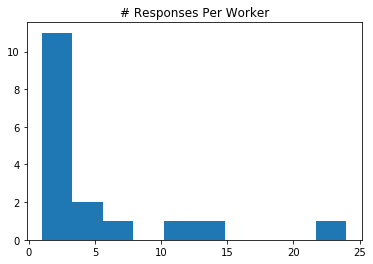

Median # seconds/HIT: 449 (112.0 s/explanation)


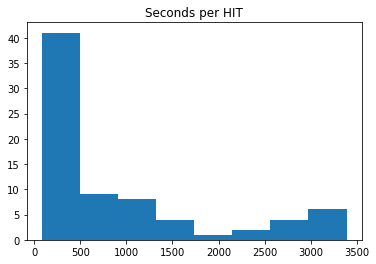

Unanimous: 65
Majority: 24
Split: 0
Bad: 11


In [11]:
from mturk_processing import MTurkHelper
helper = MTurkHelper(candidates=[], labels=[], num_hits=25, domain='vg')
explanations = helper.postprocess_visual(output_csv_path, candidates=[], verbose=True)

In [12]:
print "Number of Valid Explanations: ", len(explanations)

Number of Valid Explanations:  243


In [49]:
sys.path.append('/afs/cs.stanford.edu/u/paroma/snorkel_new/babble_snorkel/snorkel/contrib/babble')
from babble import Babbler
user_lists = {}
babbler = Babbler(None, explanations)

ValueError: Attempted relative import beyond toplevel package

In [47]:
import inspect
inspect.getfile(babbler.__class__)

'/afs/cs.stanford.edu/u/paroma/snorkel_new/snorkel/snorkel/contrib/babble/babble.pyc'

In [31]:
lfs = babbler.generate_lfs()

6 parses created from 6 out of 243 explanation(s)


In [15]:
babbler.get_explanations()

[Explanation("Explanation16: False, Box X is about thirty times larger than box Y. Box Y is but a small speck in box X."),
 Explanation("Explanation67: True, There is a person with a helmet on in x and it looks as though there is a bike behind the skateboard."),
 Explanation("Explanation89: True, The left and right edges of box Y are very close to the left and right edges of box X."),
 Explanation("Explanation109: False, A person in box x is not actively riding the bicycle in box y as it is lying on the ground."),
 Explanation("Explanation161: False, The right side of box Y is where the right side of box X is."),
 Explanation("Explanation163: False, The right edge of box Y is along the right edge of box X.")]

In [16]:
from snorkel.contrib.babble import sem_to_str

for parse in babbler.parses:
    print(sem_to_str(parse.semantics))

return -1 if call((>= 1), 30) else 0
return 1 if call((>= 1), count(tokens(('.filter_by_attr', ('.sentence',), ('.string', 'ner_tags'), ('.string', 'PERSON'))))) else 0
return 1 if call((= 1), 1) else 0
return -1 if call((>= 1), count(('.filter_by_attr', ('.filter_to_tokens', ('.sentence',)), ('.string', 'ner_tags'), ('.string', 'PERSON')))) else 0
return -1 if call((= 1), 1) else 0
return -1 if call((= 1), 1) else 0
